In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:

#Now that we have the nltk package installed, lets go over some basic natural language processing vocabulary:

#Corpus -
#Body of text, singular. Corpora is the plural of this. Example: A collection of medical journals.

#Lexicon -
#Words and their meanings. Example: English dictionary. Consider, however, that various fields will have different lexicons.

#Token -
#Each "entity" that is a part of whatever was split up based on rules. For examples, each word is a token when a sentence is "tokenized" into words. Each sentence can also be a token, if you tokenized the sentences out of a paragraph.

from nltk.tokenize import sent_tokenize, word_tokenize

text = "Hello students, how are you doing today? The olympics are inspiring, and Python is awesome. You look nice today."

print(sent_tokenize(text))

['Hello students, how are you doing today?', 'The olympics are inspiring, and Python is awesome.', 'You look nice today.']


In [3]:
print(word_tokenize(text))

['Hello', 'students', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'olympics', 'are', 'inspiring', ',', 'and', 'Python', 'is', 'awesome', '.', 'You', 'look', 'nice', 'today', '.']


In [4]:
#Stop Words with NLTK:
#When using Natural Language Processing, our goal is to perform some analysis or processing so that a computer can respond to text appropriately.
# process of converting data to something a computer can understand is referred to as "pre-processing." One of the major forms of pre-processing is going to be filtering out useless data. In natural language processing, useless words (data), are referred to as stop words.



from nltk.corpus import stopwords
print(set(stopwords.words('english')))

{'ain', 'my', 'hasn', 'hers', 'having', "mustn't", "wouldn't", 'so', 'her', 'those', "won't", 'from', "you've", 'in', 'hadn', 'won', 'out', 'these', 'whom', 'been', "you're", 'if', 'yours', 'by', 'of', 'between', 'again', 'were', 'are', 'above', 'some', "you'll", 'can', 'being', "she's", 'that', 'all', 'once', 'do', 'or', 'themselves', 'here', 'couldn', "don't", 'just', 'yourselves', "should've", 'for', 'have', 'most', 'what', 'your', 'is', 'isn', 'other', 'then', 'his', 'yourself', 'itself', 'has', 'such', 'mustn', "wasn't", 'under', "that'll", 'than', 'about', 'had', 'an', "isn't", 'over', 'not', 'our', 'wouldn', 'nor', 'during', 'off', 'should', "couldn't", 'down', "shouldn't", 'needn', 'who', "hasn't", "mightn't", 'further', 'd', 'it', 'before', 'any', 're', 'very', 'didn', 'own', 'with', "didn't", 'ourselves', 'ma', "aren't", 'into', 'its', 'how', 'a', 'be', 'them', 'now', 'y', 'you', 'don', 'each', 'shan', 'shouldn', 'myself', 'both', 'mightn', 'am', 'as', 'we', 'did', 'when', 'w

In [7]:
example_sent = "This is some sample text, showing off the stop words filtration."

stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(example_sent)

filtered_sentence = [w for w in word_tokens if not w in stop_words] # without this code is also working fine

filtered_sentence = [] #initializing empty set

for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

print(word_tokens)
print(filtered_sentence)

['This', 'is', 'some', 'sample', 'text', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.']
['This', 'sample', 'text', ',', 'showing', 'stop', 'words', 'filtration', '.']


In [8]:
#Stemming Words with NLTK:
#Stemming, which attempts to normalize sentences, is another preprocessing step that we can perform. In the english language, different variations of words and sentences often having the same meaning. Stemming is a way to account for these variations; furthermore, it will help us shorten the sentences and shorten our lookup. For example, consider the following sentence:

#I was taking a ride on my horse.
#I was riding my horse.
#These sentences mean the same thing, as noted by the same tense (-ing) in each sentence; however, that isn't intuitively understood by the computer. To account for all the variations of words in the english language, we can use the Porter stemmer, which has been around since 1979.


from nltk.stem import PorterStemmer

ps = PorterStemmer()

example_words = ["ride","riding","rider","rides"]

for w in example_words:
    print(ps.stem(w))

ride
ride
rider
ride


In [9]:
# Now lets try stemming an entire sentence!

new_text = "When riders are riding their horses, they often think of how cowboys rode horses."

words = word_tokenize(new_text)

for w in words:
    print(ps.stem(w))

when
rider
are
ride
their
hors
,
they
often
think
of
how
cowboy
rode
hors
.


In [10]:
#Part of Speech Tagging with NLTK
#Part of speech tagging means labeling words as nouns, verbs, adjectives, etc. Even better, NLTK can handle tenses! While we're at it, we are also going to import a new sentence tokenizer (PunktSentenceTokenizer). This tokenizer is capable of unsupervised learning, so it can be trained on any body of text.


# We can use documents from the nltk.corpus.  As an example, lets load the universal declaration of human rights.
from nltk.corpus import udhr
print(udhr.raw('English-Latin1'))

Universal Declaration of Human Rights
Preamble
Whereas recognition of the inherent dignity and of the equal and inalienable rights of all members of the human family is the foundation of freedom, justice and peace in the world, 

Whereas disregard and contempt for human rights have resulted in barbarous acts which have outraged the conscience of mankind, and the advent of a world in which human beings shall enjoy freedom of speech and belief and freedom from fear and want has been proclaimed as the highest aspiration of the common people, 

Whereas it is essential, if man is not to be compelled to have recourse, as a last resort, to rebellion against tyranny and oppression, that human rights should be protected by the rule of law, 

Whereas it is essential to promote the development of friendly relations between nations, 

Whereas the peoples of the United Nations have in the Charter reaffirmed their faith in fundamental human rights, in the dignity and worth of the human person and in

In [11]:
# Lets import some sample and training text - George Bush's 2005 and 2006 state of the union addresses. 

from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer

train_text = state_union.raw("2005-GWBush.txt")
sample_text = state_union.raw("2006-GWBush.txt")

In [12]:

# Now that we have some text, we can train the PunktSentenceTokenizer

custom_sent_tokenizer = PunktSentenceTokenizer(train_text)

In [13]:

# Now lets tokenize the sample_text using our trained tokenizer

tokenized = custom_sent_tokenizer.tokenize(sample_text)

In [14]:
# This function will tag each tokenized word with a part of speech

def process_content():
    try:
        for i in tokenized[:5]: #taking five rows
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            print(tagged)

    except Exception as e:
        print(str(e))

        
# The output is a list of tuples - the word with it's part of speech
process_content()

[('PRESIDENT', 'NNP'), ('GEORGE', 'NNP'), ('W.', 'NNP'), ('BUSH', 'NNP'), ("'S", 'POS'), ('ADDRESS', 'NNP'), ('BEFORE', 'IN'), ('A', 'NNP'), ('JOINT', 'NNP'), ('SESSION', 'NNP'), ('OF', 'IN'), ('THE', 'NNP'), ('CONGRESS', 'NNP'), ('ON', 'NNP'), ('THE', 'NNP'), ('STATE', 'NNP'), ('OF', 'IN'), ('THE', 'NNP'), ('UNION', 'NNP'), ('January', 'NNP'), ('31', 'CD'), (',', ','), ('2006', 'CD'), ('THE', 'NNP'), ('PRESIDENT', 'NNP'), (':', ':'), ('Thank', 'NNP'), ('you', 'PRP'), ('all', 'DT'), ('.', '.')]
[('Mr.', 'NNP'), ('Speaker', 'NNP'), (',', ','), ('Vice', 'NNP'), ('President', 'NNP'), ('Cheney', 'NNP'), (',', ','), ('members', 'NNS'), ('of', 'IN'), ('Congress', 'NNP'), (',', ','), ('members', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('Supreme', 'NNP'), ('Court', 'NNP'), ('and', 'CC'), ('diplomatic', 'JJ'), ('corps', 'NN'), (',', ','), ('distinguished', 'JJ'), ('guests', 'NNS'), (',', ','), ('and', 'CC'), ('fellow', 'JJ'), ('citizens', 'NNS'), (':', ':'), ('Today', 'VB'), ('our', 'PRP$'), ('nat

In [15]:

#Chunking with NLTK
#Now that each word has been tagged with a part of speech, we can move onto chunking: grouping the words into meaningful clusters. The main goal of chunking is to group words into "noun phrases", which is a noun with any associated verbs, adjectives, or adverbs.
#The part of speech tags that were generated in the previous step will be combined with regular expressions, such as the following:

'''
+ = match 1 or more
? = match 0 or 1 repetitions.
* = match 0 or MORE repetitions	  
. = Any character except a new line
'''

'\n+ = match 1 or more\n? = match 0 or 1 repetitions.\n* = match 0 or MORE repetitions\t  \n. = Any character except a new line\n'

In [16]:
train_text = state_union.raw("2005-GWBush.txt")
sample_text = state_union.raw("2006-GWBush.txt")

custom_sent_tokenizer = PunktSentenceTokenizer(train_text)

tokenized = custom_sent_tokenizer.tokenize(sample_text)

def process_content():
    try:
        for i in tokenized:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            
            # combine the part-of-speech tag with a regular expression
            
            chunkGram = r"""Chunk: {<RB.?>*<VB.?>*<NNP>+<NN>?}"""
            chunkParser = nltk.RegexpParser(chunkGram)
            chunked = chunkParser.parse(tagged)
            
            # draw the chunks with nltk
            # chunked.draw()     

    except Exception as e:
        print(str(e))

        
process_content()

In [17]:

'''
chunkGram = r"""Chunk: {<RB.?>*<VB.?>*<NNP>+<NN>?}"""
'''


'''
<RB.?>* = "0 or more of any tense of adverb," followed by: 

<VB.?>* = "0 or more of any tense of verb," followed by: 

<NNP>+ = "One or more proper nouns," followed by 

<NN>? = "zero or one singular noun." 

'''

'\n<RB.?>* = "0 or more of any tense of adverb," followed by: \n\n<VB.?>* = "0 or more of any tense of verb," followed by: \n\n<NNP>+ = "One or more proper nouns," followed by \n\n<NN>? = "zero or one singular noun." \n\n'

In [18]:

# We can access the chunks, which are stored as an NLTK tree 

def process_content():
    try:
        for i in tokenized:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            
            # combine the part-of-speech tag with a regular expression
            
            chunkGram = r"""Chunk: {<RB.?>*<VB.?>*<NNP>+<NN>?}"""
            chunkParser = nltk.RegexpParser(chunkGram)
            chunked = chunkParser.parse(tagged)
            
            # print(chunked)
            for subtree in chunked.subtrees(filter=lambda t: t.label() == 'Chunk'):
                print(subtree)
            
            # draw the chunks with nltk
            # chunked.draw()     

    except Exception as e:
        print(str(e))

        
process_content()

(Chunk PRESIDENT/NNP GEORGE/NNP W./NNP BUSH/NNP)
(Chunk ADDRESS/NNP)
(Chunk A/NNP JOINT/NNP SESSION/NNP)
(Chunk THE/NNP CONGRESS/NNP ON/NNP THE/NNP STATE/NNP)
(Chunk THE/NNP UNION/NNP January/NNP)
(Chunk THE/NNP PRESIDENT/NNP)
(Chunk Thank/NNP)
(Chunk Mr./NNP Speaker/NNP)
(Chunk Vice/NNP President/NNP Cheney/NNP)
(Chunk Congress/NNP)
(Chunk Supreme/NNP Court/NNP)
(Chunk called/VBD America/NNP)
(Chunk Coretta/NNP Scott/NNP King/NNP)
(Chunk Applause/NNP)
(Chunk President/NNP George/NNP W./NNP Bush/NNP)
(Chunk State/NNP)
(Chunk Union/NNP Address/NNP)
(Chunk Capitol/NNP)
(Chunk Tuesday/NNP)
(Chunk Jan/NNP)
(Chunk White/NNP House/NNP photo/NN)
(Chunk Eric/NNP DraperEvery/NNP time/NN)
(Chunk Capitol/NNP dome/NN)
(Chunk have/VBP served/VBN America/NNP)
(Chunk Tonight/NNP)
(Chunk Union/NNP)
(Chunk Applause/NNP)
(Chunk United/NNP)
(Chunk America/NNP)
(Chunk Applause/NNP)
(Chunk America/NNP)
(Chunk September/NNP)
(Chunk Dictatorships/NNP shelter/NN)
(Chunk Applause/NNP)
(Chunk Afghanistan/NNP)
(

In [19]:
#Named Entity Recognition with NLTK¶
#One of the most common forms of chunking in natural language processing is called "Named Entity Recognition." NLTK is able to identify people, places, things, locations, monetary figures, and more.
#There are two major options with NLTK's named entity recognition: either recognize all named entities, or recognize named entities as their respective type, like people, places, locations, etc.
#Here, with the option of binary = True, this means either something is a named entity, or not. There will be no further detail.

def process_content():
    try:
        for i in tokenized[5:]:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            namedEnt = nltk.ne_chunk(tagged, binary=True)
            # namedEnt.draw()
            
    except Exception as e:
        print(str(e))

        
process_content()

In [20]:

#Text Classification
# classification using NLTK
#Now that we have covered the basics of preprocessing for Natural Language Processing, we can move on to text classification using simple machine learning classification algorithms.


import random
import nltk
from nltk.corpus import movie_reviews

documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# shuffle the documents
random.shuffle(documents)

print('Number of Documents: {}'.format(len(documents)))
print('First Review: {}'.format(documents[1]))

all_words = []
for w in movie_reviews.words():
    all_words.append(w.lower())

all_words = nltk.FreqDist(all_words)

print('Most common words: {}'.format(all_words.most_common(15)))
print('The word happy: {}'.format(all_words["happy"]))

Number of Documents: 2000
First Review: (['"', 'living', 'out', 'loud', ',', '"', 'is', 'the', 'type', 'of', 'motion', 'picture', 'we', 'don', "'", 't', 'often', 'see', ':', 'it', 'is', 'a', 'film', 'about', 'mature', ',', 'intelligent', 'adults', ',', 'instead', 'of', 'the', 'usual', 'american', 'film', ',', 'in', 'which', 'children', 'basically', 'dress', 'up', 'in', 'grown', '-', 'up', 'clothing', 'and', 'parade', 'around', 'acting', 'like', 'immature', 'seven', '-', 'year', '-', 'olds', '.', 'judith', '(', 'holly', 'hunter', ')', ',', 'a', 'fortysomething', 'living', 'in', 'new', 'york', 'city', ',', 'has', 'been', 'having', 'a', 'difficult', 'time', 'with', 'life', 'lately', '.', 'she', 'is', 'extremely', 'depressed', 'about', 'her', 'recent', 'divorce', 'to', 'her', 'husband', '(', 'martin', 'donovan', ')', ',', 'who', 'had', 'been', 'cheating', 'on', 'her', '.', 'she', 'cannot', 'sleep', ',', 'haunted', 'by', 'terrible', 'memories', ',', 'often', 'imagines', 'off', '-', 'the', '

In [21]:
# We'll use the 4000 most common words as features
print(len(all_words))
word_features = list(all_words.keys())[:4000]

39768


In [22]:
# The find_features function will determine which of the 3000 word features are contained in the review
def find_features(document):
    words = set(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features


# Lets use an example from a negative review
features = find_features(movie_reviews.words('neg/cv000_29416.txt'))
for key, value in features.items():
    if value == True:
        print (key)

plot
:
two
teen
couples
go
to
a
church
party
,
drink
and
then
drive
.
they
get
into
an
accident
one
of
the
guys
dies
but
his
girlfriend
continues
see
him
in
her
life
has
nightmares
what
'
s
deal
?
watch
movie
"
sorta
find
out
critique
mind
-
fuck
for
generation
that
touches
on
very
cool
idea
presents
it
bad
package
which
is
makes
this
review
even
harder
write
since
i
generally
applaud
films
attempt
break
mold
mess
with
your
head
such
(
lost
highway
&
memento
)
there
are
good
ways
making
all
types
these
folks
just
didn
t
snag
correctly
seem
have
taken
pretty
neat
concept
executed
terribly
so
problems
well
its
main
problem
simply
too
jumbled
starts
off
normal
downshifts
fantasy
world
you
as
audience
member
no
going
dreams
characters
coming
back
from
dead
others
who
look
like
strange
apparitions
disappearances
looooot
chase
scenes
tons
weird
things
happen
most
not
explained
now
personally
don
trying
unravel
film
every
when
does
give
me
same
clue
over
again
kind
fed
up
after
while
biggest


In [23]:
# Now lets do it for all the documents
featuresets = [(find_features(rev), category) for (rev, category) in documents]

In [24]:

# we can split the featuresets into training and testing datasets using sklearn
from sklearn import model_selection

# define a seed for reproducibility
seed = 1

# split the data into training and testing datasets
training, testing = model_selection.train_test_split(featuresets, test_size = 0.25, random_state=seed)

In [25]:

print(len(training))
print(len(testing))

1500
500


In [26]:
# We can use sklearn algorithms in NLTK
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC

model = SklearnClassifier(SVC(kernel = 'linear'))

# train the model on the training data
model.train(training)

# and test on the testing dataset!
accuracy = nltk.classify.accuracy(model, testing)*100
print("SVC Accuracy: {}".format(accuracy))

SVC Accuracy: 83.39999999999999


# Sentimental Analysis

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
data=pd.read_csv('Restaurant_Reviews.tsv',delimiter="\t",quoting=3)
# quoting =3 ignores double quotes that could lead to processing errors.

In [29]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [30]:
#Cleaning of texts
#One of the major requirement of NLP(sentiment analysis basically) is to clean the text before training any model on it. Cleaning majorly consists of:

# 1-Removing punctuations
# 2-Converting all the words to lower case
# 3-Removing stop words like "a, an, the, or etc" that arent quite relevant in predicting sentiment


import re #library for simplifying reviews
import nltk
nltk.download('stopwords') #downloading all the stopwords
from nltk.corpus import stopwords #importing stopwords to our notebook
from nltk.stem.porter import PorterStemmer #Stemming is a process that converts a word to its root eg loved => love, stayed => stay.
# this is necessary to optimise the dimention of the sparse matrix that will be made.


corpus = [] # new list that will contain all the cleaned reviews
for i in range(0,1000):
    #remove punctuation by replacing all punctuation with space
    review = re.sub("[^a-zA-z | ^\w+'t]",' ', data['Review'][i])
    
    #transform all capital letters to lower case
    review = review.lower()
    
    #split review to different words to apply stemming
    review = review.split()
    
    #stemming and also ignoring stopwords alongside
    ps = PorterStemmer()
    all_stopwords=stopwords.words('english')
    r_words=['no','not','off','nor',"didn't","isn't","couldn't","haven't",'or',"should've","aren't",
             "couldn","didn","doesn't",'doesn',"don't",'don','hadn',"hadn't",'hasn',"hasn't",'haven',
             'mightn',"mightn't",'mustn',"mustn't","needn't",'needn',"shouldn","shouldn't",'wasn',
             "wasn't","won't","won","wouldn't","because","same",'wouldn','should']
    for words in r_words:
        all_stopwords.remove(words)
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    
    #joining words together to form a cleaned review
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rakshit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday off rick steve recommend love', 'select menu great price', 'get angri want damn pho', "honeslti didn't tast fresh", 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier no care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust becaus pretti sure human hair', 'shock becaus no sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', "that' right red velvet cake ohhh stuff good", 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food 4 tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer 23 decent deal', 'like

In [32]:

#Creating Bag of Words Model
#This is the major portion of sentiment analysis to create the model which will consist of making the sparse matrix using different words from each review will constitute columns of the matrix and each row will correspond to a review.

#The bag-of-words (BOW) model is a representation that turns arbitrary text into fixed-length vectors by counting how many times each word appears. This process is often referred to as vectorization.

#Here we loose contextual info about the review i.e its order. Its apparently a bag of words!

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y=data.iloc[:,-1].values

In [33]:
len(X[0])

1610

In [34]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## LOGISTIC REGRESSION

In [35]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression()

In [36]:
y_model1=model1.predict(X_test)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_model1))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        97
           1       0.85      0.80      0.82       103

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



Text(33.0, 0.5, 'Actual')

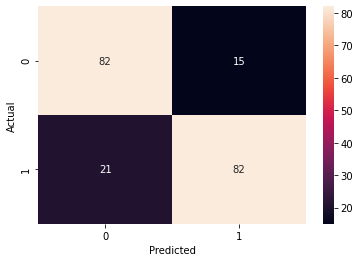

In [38]:
cm=confusion_matrix(y_test,y_model1)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

## NAIVE BAYES

In [39]:
from sklearn.naive_bayes import GaussianNB
model2=GaussianNB()
model2.fit(X_train,y_train)

GaussianNB()

In [40]:
y_model2 = model2.predict(X_test)

In [41]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_model2))

              precision    recall  f1-score   support

           0       0.81      0.58      0.67        97
           1       0.69      0.87      0.77       103

    accuracy                           0.73       200
   macro avg       0.75      0.73      0.72       200
weighted avg       0.75      0.73      0.72       200



Text(33.0, 0.5, 'Actual')

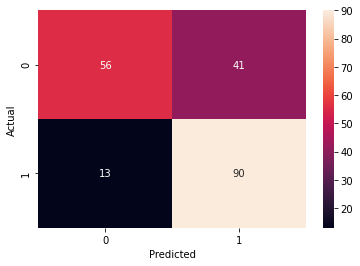

In [42]:

cm=confusion_matrix(y_test,y_model2)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

## SVM

In [43]:
from sklearn.svm import SVC
model3=SVC(kernel='rbf')
model3.fit(X_train,y_train)

SVC()

In [44]:

y_model3 = model3.predict(X_test)

In [45]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_model3))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82        97
           1       0.90      0.70      0.79       103

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.80       200
weighted avg       0.82      0.81      0.80       200

